Iterations ENKF <class 'model2_class.Model2'>: 100%|██████████| 396/396 [00:45<00:00,  8.64it/s]
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:294: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:218: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])


This is the macro state vectors  [4852248.519809266, 919868.3806516386, 169625.65594450518, 15639.927888180355]
This is the macro state vectors length 396
This is the wealth groups data [[0.2344298107728848, 0.23405069647280038, 0.2353373991544376, 0.23575810401959993, 0.23533514723585006, 0.23651642949453597, 0.2372224950317562, 0.23833822959242923, 0.23793052511788232, 0.23752365872149572, 0.23742596899043647, 0.23736959211191383, 0.23795056776232645, 0.23748199210425405, 0.2370143796512725, 0.23821276609699896, 0.23829866402134897, 0.2378499288365488, 0.23750489617602924, 0.23783892144718977, 0.23874782867383465, 0.23827761416458526, 0.23885672328298896, 0.23949631004547814, 0.23914789308034376, 0.23900575252845774, 0.23925446855355245, 0.23892710473895015, 0.23938154263921785, 0.23928003383813862, 0.24030931483514512, 0.32013593463465156, 0.32030010337242804, 0.31984725402476244, 0.31937477953449017, 0.31873882809846416, 0.31849474831809227, 0.31858006659920635, 0.31987801471891475

C:\Users\yoswald\AppData\Local\Temp\ipykernel_41820\2884606050.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_41820\2884606050.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])


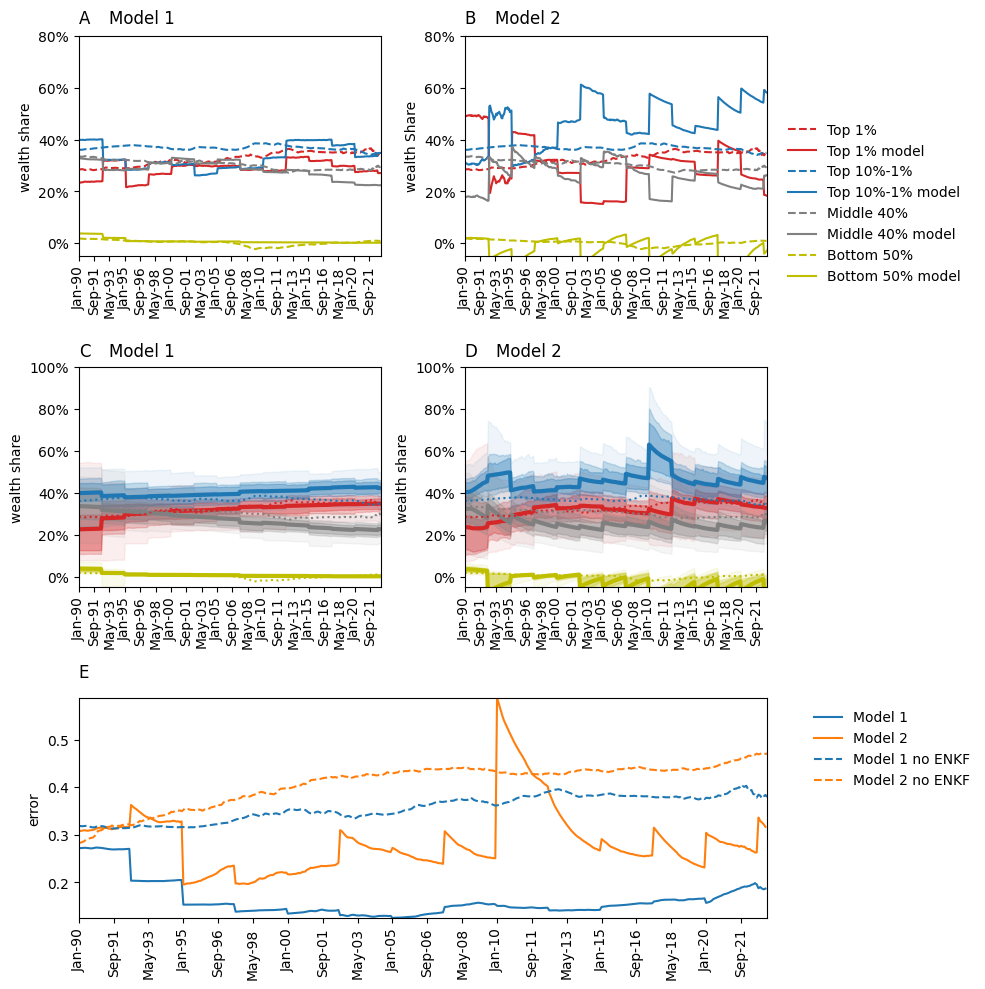

In [7]:
#General packages
import os
import numpy as np
from tqdm import tqdm  ### package for progress bars
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
### MODEL 1 infrastructure
import pandas as pd
from model1_class import Model1
from run_enkf import *
### MODEL 2 infrastructure
from model2_class import Model2
#from run_both_models_n_times_and_compute_error import *
import import_ipynb
import matplotlib.ticker as mtick
tqdm.pandas()

#%%


class Experiment1:
    def __init__(self, num_agents, ensemble_size, macro_state_dim, start_year, end_year, filter_freq):
        self.num_agents = num_agents
        self.ensemble_size = ensemble_size
        self.macro_state_dim = macro_state_dim
        self.enkf1 = None
        self.enkf2 = None
        self.start_year = start_year
        self.end_year = end_year

    def run_both_enkf(self, filter_freq):
        
        model_params1 = {"population_size": self.num_agents,
                        "growth_rate": 0.025,
                        "b_begin": 1.3,
                        "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                        "start_year": self.start_year,
                        "uncertainty_para": 0.1}
        
        model_params2 = {"population_size": self.num_agents, 
                        "concavity": 1,
                        "growth_rate": 0.025, 
                        "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                        "start_year": self.start_year,
                        "adaptive_sensitivity": 0.02,
                        "uncertainty_para": 0}

        
        self.enkf1 = prepare_enkf(Model1,
                                  model_params= model_params1,
                                  ensemble_size = self.ensemble_size,
                                  macro_state_dim = self.macro_state_dim,
                                  filter_freq = filter_freq,
                                  uncertainty_obs = 0.5)
        
        self.enkf2 = prepare_enkf(Model2,
                                   model_params= model_params2,
                                  ensemble_size = self.ensemble_size,
                                  macro_state_dim = self.macro_state_dim,
                                  filter_freq = filter_freq,
                                  uncertainty_obs = 0.5)
        
        run_enkf(self.enkf1, start_year=self.start_year, end_year=self.end_year, filter_freq = filter_freq)
        run_enkf(self.enkf2, start_year=self.start_year, end_year=self.end_year, filter_freq = filter_freq)

    def plot_results(self):

        fig = plt.figure(figsize=(10, 10))
        # Create a gridspec object
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
        # Create individual subplots
        ax0 = plt.subplot(gs[0, 0])
        ax1 = plt.subplot(gs[0, 1])
        ax2 = plt.subplot(gs[1, 0])
        ax3 = plt.subplot(gs[1, 1])
        ax4 = plt.subplot(gs[2, :])  # This one spans both columns

        
        self.enkf1.models[0].plot_wealth_groups_over_time(ax0, self.start_year, self.end_year)
        self.enkf2.models[0].plot_wealth_groups_over_time(ax1, self.start_year, self.end_year)
        self.enkf1.plot_fanchart(ax2)
        self.enkf2.plot_fanchart(ax3)        
        self.enkf1.plot_error(ax4)
        self.enkf2.plot_error(ax4)

        ###EXTRAS
        #AX0
        ax0.text(0, 0.85, 'A', fontsize = 12)
        ax0.text(40, 0.85, 'Model 1', fontsize = 12)
        #AX1
        ax1.legend(loc=(1.05, -0.15), frameon = False) ### legend only here
        ax1.text(0, 0.85, 'B', fontsize = 12)
        ax1.text(40, 0.85, 'Model 2', fontsize = 12)
        #AX2
        ax2.text(0, 1.05, 'C', fontsize = 12)
        ax2.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
        ax2.text(40,1.05, 'Model 1', fontsize = 12)
        #AX3
        ax3.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%', '100%'])
        ax3.text(0,1.05, 'D', fontsize = 12)
        ax3.text(40,1.05, 'Model 2', fontsize = 12)

        path = '..'
        with open(os.path.join(path, 'data', 'mean_errors.csv')) as f:
            errors_df_no_enkf = pd.read_csv(f, encoding='unicode_escape')

        ax4.plot(errors_df_no_enkf['mean_error_model1'], linestyle='--', label='Model 1 no ENKF', color='tab:blue')
        ax4.plot(errors_df_no_enkf['mean_error_model2'], linestyle='--', label='Model 2 no ENKF', color='tab:orange')
        ax4.legend(bbox_to_anchor=(1.05, 1), frameon=False)
        
        # Get the limits
        x_min, x_max = ax4.get_xlim()
        y_min, y_max = ax4.get_ylim()
        ax4.text(0, y_max+0.02, 'E', fontsize = 12)
        ax4.margins(0)


        plt.tight_layout()
        plt.savefig('fig4.png', dpi=300)
        plt.show()
         
        
# Example usage
if __name__ == "__main__":
    filter_freq = 30
    experiment1 = Experiment1(num_agents=10, 
                              ensemble_size=100, 
                              macro_state_dim=3, 
                              start_year=1990,
                              end_year=2022,
                              filter_freq = filter_freq)
    experiment1.run_both_enkf(filter_freq = filter_freq)
    experiment1.plot_results()
    agent_states_model1 = experiment1.enkf1.micro_history
    agent_states_model2 = experiment1.enkf2.micro_history
    #experiment1.enkf1.plot_macro_state()

    # get eigenvalues of model 2
    eigenvalues_model2 = experiment1.enkf2.eigenvalues_diff_history

## Plot analysis of numerical instability without filter correction/intervention

In [8]:
# plot agent_states_model1 average over all agents
'''all_agents_model1_states = list()

experiment1.enkf1.macro_history


testyyy = experiment1.enkf1.macro_history[0]
testyyy2 = experiment1.enkf1.macro_history
# save both as csv
np.savetxt("testyyy.csv", testyyy, delimiter=",")
np.savetxt("testyyy2.csv", testyyy2, delimiter=",")


testxxx = np.mean(np.mean(experiment1.enkf1.micro_history[0], axis=0), axis=0)
# loop over length of agent_states_model1
for i in range(len(experiment1.enkf1.micro_history)):
    print(i)
    all_agents_model1_states.append(np.sum(np.sum(experiment1.enkf1.micro_history[i], axis=0), axis=0))


'''



'all_agents_model1_states = list()\n\nexperiment1.enkf1.macro_history\n\n\ntestyyy = experiment1.enkf1.macro_history[0]\ntestyyy2 = experiment1.enkf1.macro_history\n# save both as csv\nnp.savetxt("testyyy.csv", testyyy, delimiter=",")\nnp.savetxt("testyyy2.csv", testyyy2, delimiter=",")\n\n\ntestxxx = np.mean(np.mean(experiment1.enkf1.micro_history[0], axis=0), axis=0)\n# loop over length of agent_states_model1\nfor i in range(len(experiment1.enkf1.micro_history)):\n    print(i)\n    all_agents_model1_states.append(np.sum(np.sum(experiment1.enkf1.micro_history[i], axis=0), axis=0))\n\n\n'

## Plot agent-state variables and how the ENKF affects them

### Collect data from model 1

In [9]:
# Initialize an empty list to store the data
data = []
# Iterate over each array in the micro_history
for time_step, array in enumerate(agent_states_model1):
    # Create a DataFrame from the array
    df = pd.DataFrame(array)
    
    # Add the time_step column
    df['time_step'] = time_step + 1
    
    print(df.head())
    # Append the DataFrame to the list
    data.append(df)

# Concatenate the list into a single DataFrame
result_df = pd.concat(data, ignore_index=True)

# Optionally, rename the columns to be more descriptive
result_df.columns = [f'ensemble_member_{i}' for i in range(result_df.shape[1] - 1)] + ['time_step']

print(result_df.head())


              0             1             2             3             4  \
0  5.290667e+06  1.830333e+07  8.417067e+06  1.498544e+06  8.218162e+06   
1  1.889673e+06  9.290551e+06  2.948559e+06  1.444447e+06  1.707500e+06   
2  1.259878e+06  7.864648e+06  2.693007e+06  1.051094e+06  1.141463e+06   
3  9.197304e+05  2.678675e+06  2.033202e+06  9.704609e+05  1.000563e+06   
4  8.641222e+05  9.112770e+05  1.130749e+06  8.700985e+05  7.791532e+05   

              5             6             7             8             9  ...  \
0  4.306639e+06  3.535442e+06  9.786167e+06  8.874707e+06  1.237620e+07  ...   
1  3.926674e+06  1.963435e+06  7.196773e+06  1.727642e+06  4.602769e+06  ...   
2  1.227387e+06  1.741301e+06  1.733798e+06  1.473046e+06  4.336511e+06  ...   
3  1.129236e+06  1.498716e+06  9.891235e+05  9.342101e+05  1.661312e+06  ...   
4  1.062582e+06  1.472728e+06  9.699382e+05  8.914189e+05  9.278599e+05  ...   

             91            92            93            94           

### Collect data from model 2

In [10]:
# Initialize an empty list to store the data
data_model2 = []

# Iterate over each array in the micro_history
for time_step, array in enumerate(agent_states_model2):
    # Create a DataFrame from the array
    df = pd.DataFrame(array)
    
    # Add the time_step column
    df['time_step'] = time_step + 1
    
    print(df.head())
    # Append the DataFrame to the list
    data_model2.append(df)

# Concatenate the list into a single DataFrame
result_df_model2 = pd.concat(data_model2, ignore_index=True)

# Optionally, rename the columns to be more descriptive
result_df_model2.columns = [f'ensemble_member_{i}' for i in range(result_df_model2.shape[1] - 1)] + ['time_step']

print(result_df_model2.head())


              0             1             2             3             4  \
0  4.603949e+07  3.339185e+07  2.336264e+07  7.927625e+06  3.445467e+06   
1  9.396996e+06  4.183286e+06  4.725109e+06  7.130597e+06  3.331298e+06   
2  7.681435e+06  3.327963e+06  3.556837e+06  5.961897e+06  2.884914e+06   
3  2.949277e+06  2.456083e+06  3.443945e+06  5.512114e+06  2.014282e+06   
4  2.752099e+06  2.217240e+06  3.106414e+06  5.340824e+06  1.543509e+06   

              5             6             7             8             9  ...  \
0  7.126417e+06  3.625136e+07  6.831988e+06  7.814832e+06  6.189492e+06  ...   
1  5.511378e+06  6.575969e+06  5.760886e+06  5.953844e+06  2.734126e+06  ...   
2  5.386972e+06  4.442763e+06  4.475136e+06  3.314230e+06  2.365766e+06  ...   
3  3.210805e+06  4.193445e+06  2.459752e+06  3.290900e+06  2.305493e+06  ...   
4  3.149169e+06  3.759531e+06  1.329250e+06  1.860535e+06  2.150134e+06  ...   

             91            92            93            94           

## Try plotting average of ensembles evolution

c:\Users\yoswald\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yoswald\AppData\Local\Temp\ipykernel_41820\3828414789.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_avg['log_wealth'] = np.log(result_df_avg['average_wealth'])
c:\Users\yoswald\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yoswald\AppData\Local\Temp\ipykernel_41820\3828414789.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Text(0.5, 1.0, 'Model 2')

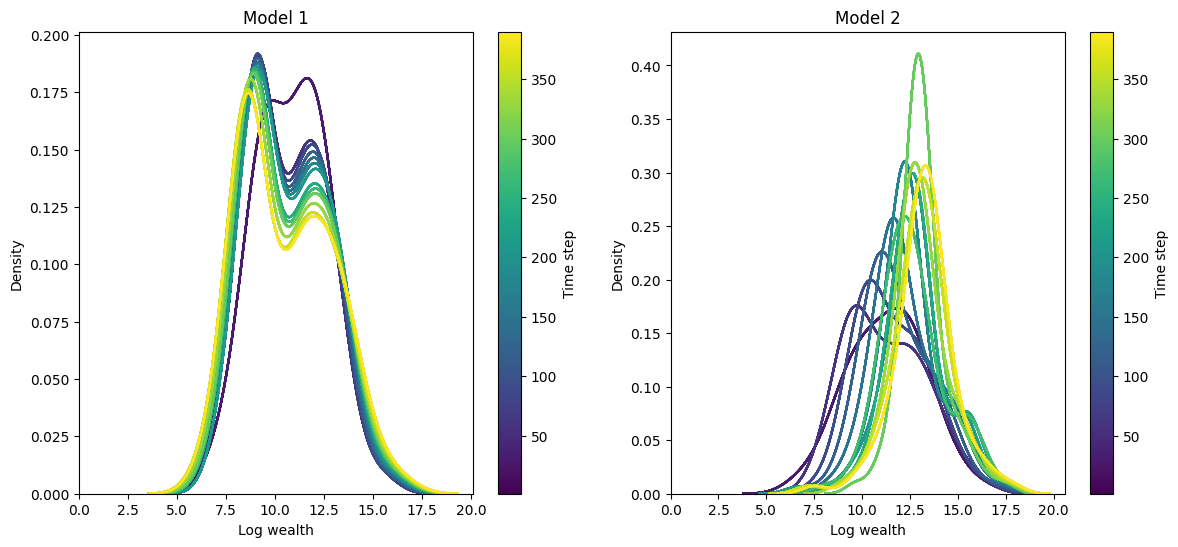

In [11]:

# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# build average of all ensemble members
result_df['average_wealth'] = result_df.iloc[:, 1:-1].mean(axis=1)
result_df_avg = result_df[['time_step', 'average_wealth']]

# log transform the average data
result_df_avg['log_wealth'] = np.log(result_df_avg['average_wealth'])

# loop over time steps and plot all data as kernel density estimates with a colormap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=1, vmax=390)

for time_step in range(1, 390):
    color = cmap(norm(time_step))
    sns.kdeplot(result_df_avg[result_df_avg['time_step'] == time_step]['log_wealth'], ax=ax1, color=color, label=f'Time step {time_step}', alpha=0.6)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)
cbar.set_label('Time step')
ax1.set_xlabel('Log wealth')
ax1.set_ylabel('Density')
# set left x axis limit at 0
ax1.set_xlim(left=0)
ax1.set_title('Model 1')


## Model 2
# build average of all ensemble members
result_df_model2['average_wealth'] = result_df_model2.iloc[:, 1:-1].mean(axis=1)
result_df_avg_model2 = result_df_model2[['time_step', 'average_wealth']]
# log transform the average data
result_df_avg_model2['log_wealth'] = np.log(result_df_avg_model2['average_wealth'])

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=1, vmax=390)
for time_step in range(1, 390):
    color = cmap(norm(time_step))
    sns.kdeplot(result_df_avg_model2[result_df_avg_model2['time_step'] == time_step]['log_wealth'], ax=ax2, color=color, label=f'Time step {time_step}', alpha=0.6)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2)
cbar.set_label('Time step')
ax2.set_xlabel('Log wealth')
ax2.set_ylabel('Density')
# set left x axis limit at 0
ax2.set_xlim(left=0)
ax2.set_title('Model 2')

## Plot first update state average across ensemble members vs. observations as well

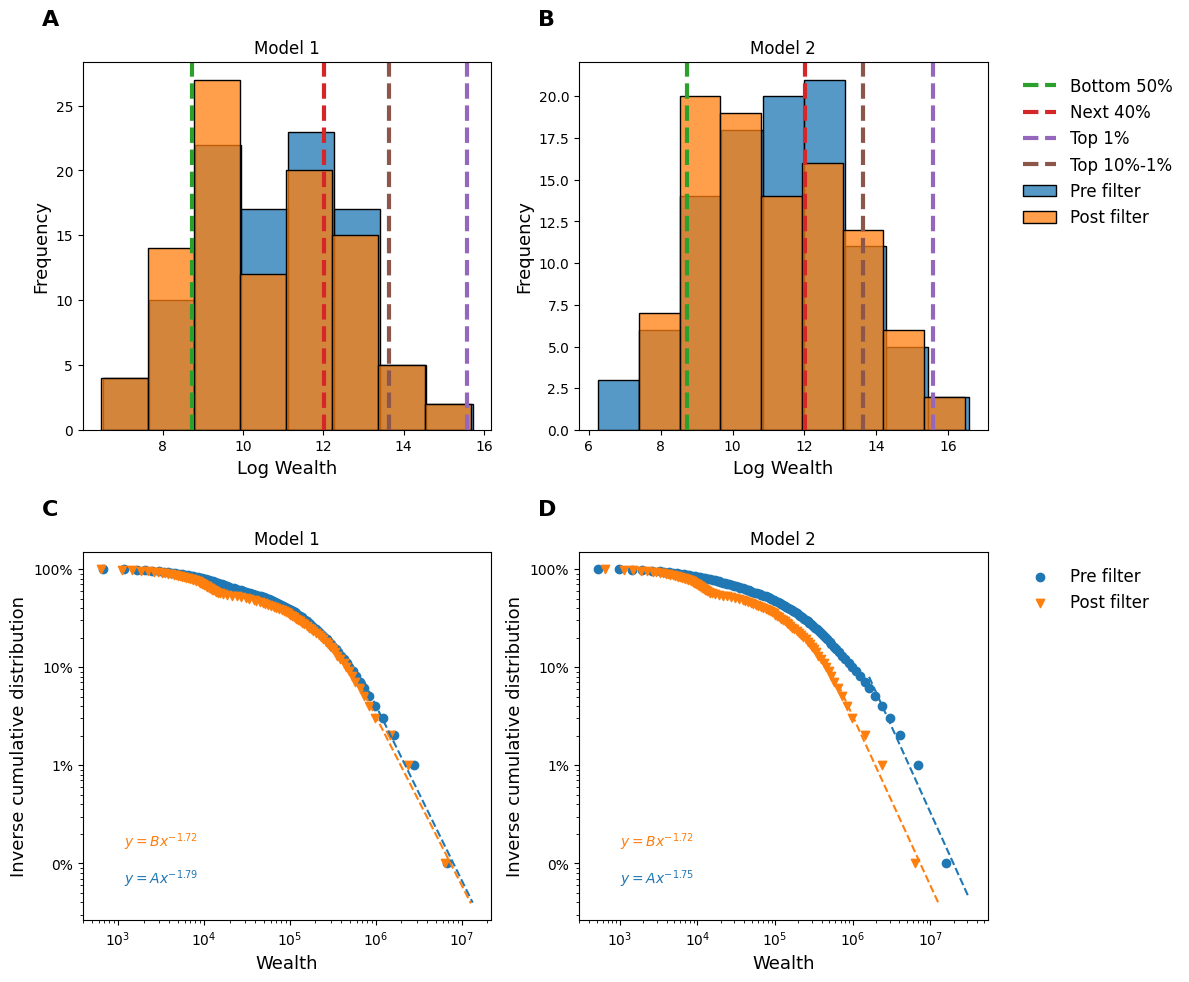

In [12]:
# Load the empirical data
path = '..'
with open(os.path.join(path, 'data', 'wealth_data_for_import.csv')) as f:
    wealth_data = pd.read_csv(f, encoding='unicode_escape')


# Plot time step 20 and 40 kernel density estimates of the log values
# Plot kernel density estimates and empirical data in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# First model KDE plots
sns.histplot(result_df_avg[result_df_avg['time_step'] == 31]['log_wealth'], ax=ax1, label='Time step 31: Pre filter', color='tab:blue')
sns.histplot(result_df_avg[result_df_avg['time_step'] == 32]['log_wealth'], ax=ax1, label='Time step 32: Post filter', color='tab:orange')

# Subset the data to the years 1990-2022
wealth_data = wealth_data[(wealth_data['year'] >= 1990) & (wealth_data['year'] <= 2022)]
# Subset wealth data based on column year being 1992 and month column being 7
wealth_data_empirical = wealth_data[(wealth_data['year'] == 1992) & (wealth_data['month'] == 7)]
# Subset the column real_wealth_per_unit only and log transform the data
wealth_data_empirical_log = np.log(wealth_data_empirical['real_wealth_per_unit'])

# Plot vertical lines for the empirical data
empirical_labels = ['Bottom 50%', 'Next 40%', 'Top 1%', 'Top 10%-1%']
empirical_colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for i, (value, label, color) in enumerate(zip(wealth_data_empirical_log, empirical_labels, empirical_colors)):
    ax1.axvline(value, color=color, linestyle='--', linewidth=3, label=label)
    ax2.axvline(value, color=color, linestyle='--', linewidth=3, label=label)

# Second model KDE plots
sns.histplot(result_df_avg_model2[result_df_avg_model2['time_step'] == 31]['log_wealth'], ax=ax2, label='Pre filter', color='tab:blue')
sns.histplot(result_df_avg_model2[result_df_avg_model2['time_step'] == 32]['log_wealth'], ax=ax2, label='Post filter', color='tab:orange')

# Adjust layout to fit legends outside the plots
fig.tight_layout(rect=[0, 0, 0.85, 1])

fontsize_axislabels = 13

# Place the legend outside the second subplot
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, frameon=False)

# Set titles and labels
ax1.set_title('Model 1')
ax1.set_xlabel('Log Wealth', fontsize=fontsize_axislabels)
ax1.set_ylabel('Frequency', fontsize=fontsize_axislabels)

ax2.set_title('Model 2')
ax2.set_xlabel('Log Wealth', fontsize=fontsize_axislabels)
ax2.set_ylabel('Frequency', fontsize=fontsize_axislabels)

ax3.set_title('Model 1')
ax4.set_title('Model 2')

# Plot the non log wealth as inverse cumulative distribution
values_model1_pre_update = np.sort(result_df_avg[result_df_avg['time_step'] == 31]['average_wealth'])
values_model1_post_update = np.sort(result_df_avg[result_df_avg['time_step'] == 32]['average_wealth'])
# make cumulative percentiles of values
percentiles = np.linspace(0, 100, len(values_model1_pre_update))/100
# plot the percentiles
inv_cumulative = 1-percentiles
# last value add tiny positive value to avoid log(0)
inv_cumulative[-1] = inv_cumulative[-1] + 1e-3
# plot the percentiles
ax3.scatter(values_model1_pre_update, inv_cumulative, label='Pre filter', color='tab:blue')
ax3.scatter(values_model1_post_update, inv_cumulative, label='Post filter', color='tab:orange', marker = "v")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('Wealth', fontsize=fontsize_axislabels)
ax3.set_ylabel('Inverse cumulative distribution', fontsize=fontsize_axislabels)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))



# Plot the non log wealth as inverse cumulative distribution
values_model2_pre_update = np.sort(result_df_avg_model2[result_df_avg_model2['time_step'] == 31]['average_wealth'])
values_model2_post_update = np.sort(result_df_avg[result_df_avg['time_step'] == 32]['average_wealth'])
# make cumulative percentiles of values
percentiles = np.linspace(0, 100, len(values_model2_pre_update))/100

ax4.scatter(values_model2_pre_update, inv_cumulative, label='Pre filter', color='tab:blue')
ax4.scatter(values_model2_post_update, inv_cumulative, label='Post filter', color='tab:orange', marker = "v")
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_xlabel('Wealth', fontsize=fontsize_axislabels)
ax4.set_ylabel('Inverse cumulative distribution', fontsize=fontsize_axislabels)
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, frameon=False)


# Label the panels
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes, size=16, weight='bold')
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes, size=16, weight='bold')
ax3.text(-0.1, 1.1, 'C', transform=ax3.transAxes, size=16, weight='bold')
ax4.text(-0.1, 1.1, 'D', transform=ax4.transAxes, size=16, weight='bold')




# make the power law fits for panel 1 and panel 2 
last7 = values_model1_pre_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
# Create dummy data using the min of last7 and max of last7 times 2
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax3.plot(x_dummy, power_law, label='Power law fit', color='tab:blue', linestyle='--')
# plot equation lower left corner of ax3
ax3.text(0.1, 0.1, f'$y = Ax^{{{slope:.2f}}}$', transform=ax3.transAxes, color='tab:blue')


# do fit for the  values_model1_post_update
last7 = values_model1_post_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax3.plot(x_dummy, power_law, label='Power law fit', color='tab:orange', linestyle='--')
# plot equation lower left corner of ax3
ax3.text(0.1, 0.2, f'$y = Bx^{{{slope:.2f}}}$', transform=ax3.transAxes, color='tab:orange')

# do the fit for the model 2 values_model2_pre_update
last7 = values_model2_pre_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax4.plot(x_dummy, power_law, label='Power law fit', color='tab:blue', linestyle='--')
# plot equation lower left corner of ax3
ax4.text(0.1, 0.1, f'$y = Ax^{{{slope:.2f}}}$', transform=ax4.transAxes, color='tab:blue')


# do fit for the  values_model2_post_update
last7 = values_model2_post_update[-7:]
# last 7 percentiles
inv_cumulative_last7 = inv_cumulative[-7:]
# make linear fit of last7 as x and percentiles_last7 as y
slope, intercept = np.polyfit(np.log(last7), np.log(inv_cumulative_last7), 1)
# make power law fit with the slope and intercept
x_dummy = np.linspace(min(last7), max(last7) * 2, 100)
power_law = np.exp(slope*np.log(x_dummy) + intercept)
ax4.plot(x_dummy, power_law, label='Power law fit', color='tab:orange', linestyle='--')
# plot equation lower left corner of ax4
ax4.text(0.1, 0.2, f'$y = Bx^{{{slope:.2f}}}$', transform=ax4.transAxes, color='tab:orange')

plt.tight_layout()

plt.savefig('fig5.png', dpi=300)

